In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns

import pandas as pd
import seaborn as sns
import matplotlib as mpl

mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 600
mpl.rcParams["savefig.transparent"] = True
mpl.rcParams["font.size"] = 15
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans"]
mpl.rcParams["axes.titlesize"] = "xx-large"  # medium, large, x-large, xx-large
mpl.rcParams["svg.fonttype"] = "none"

mpl.style.use("seaborn-deep")

In [2]:
import pandas as pd

def filter_dataframe(df, start_time, duration):
    df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])
    end_time = start_time + duration
    return df[(df['DATETIME'] >= start_time) & (df['DATETIME'] <= end_time)]

# Load your dataframes
humid_0217 = pd.read_csv('../data/humidity-and-temp/20220217/humid_20220217-20220225.txt',sep='\t',skiprows=7)
humid_0312 = pd.read_csv('../data/humidity-and-temp/20220312/humid_20220312-20220323.txt',sep='\t',skiprows=7)
humid_0326 = pd.read_csv('../data/humidity-and-temp/20220326/humid_20220326-20220406.txt',sep='\t',skiprows=7)
humid_0418 = pd.read_csv('../data/humidity-and-temp/20220418/humid_20220418-20220428.txt',sep='\t',skiprows=7)

# Define the start time and duration for each dataframe and apply the filtering function
humid_0217 = filter_dataframe(humid_0217, pd.Timestamp('2022-02-17 12:37:33'), pd.Timedelta(hours=187))
humid_0312 = filter_dataframe(humid_0312, pd.Timestamp('2022-03-12 21:17:00'), pd.Timedelta(hours=119))
humid_0326 = filter_dataframe(humid_0326, pd.Timestamp('2022-03-26 15:50:00'), pd.Timedelta(hours=132))
humid_0418 = filter_dataframe(humid_0418, pd.Timestamp('2022-04-18 15:06:00'), pd.Timedelta(hours=156))

# Now, your dataframes have been filtered according to the specified start times and durations.


In [3]:
list_of_humid = [humid_0217,humid_0312,humid_0326,humid_0418]
df = pd.concat([humid_0217,humid_0312,humid_0326,humid_0418],ignore_index=True)

In [4]:
!mkdir -p ../data/humid_temp/subsampled/
!mkdir -p ../data/humid_temp/raw/

In [11]:
for df in list_of_humid:
    df.to_csv(f'/Genomics/ayroleslab2/scott/git/lts-manuscript/data/humid_temp/subsampled/{df.DATE[0]}.csv')

KeyError: 1

In [4]:
for df in list_of_humid:
    df.loc[:,'datetime'] = pd.to_datetime(df.DATE.astype(str)+' '+df.TIME.astype(str))
    df.loc[:,'zeit'] = df.datetime.dt.hour + df.datetime.dt.minute/60
# df = df.drop(columns=['DATE', 'TIME'])

In [5]:
# df_long = pd.melt(df, id_vars=["zeit"], var_name="variable", value_name="value")
# df_long

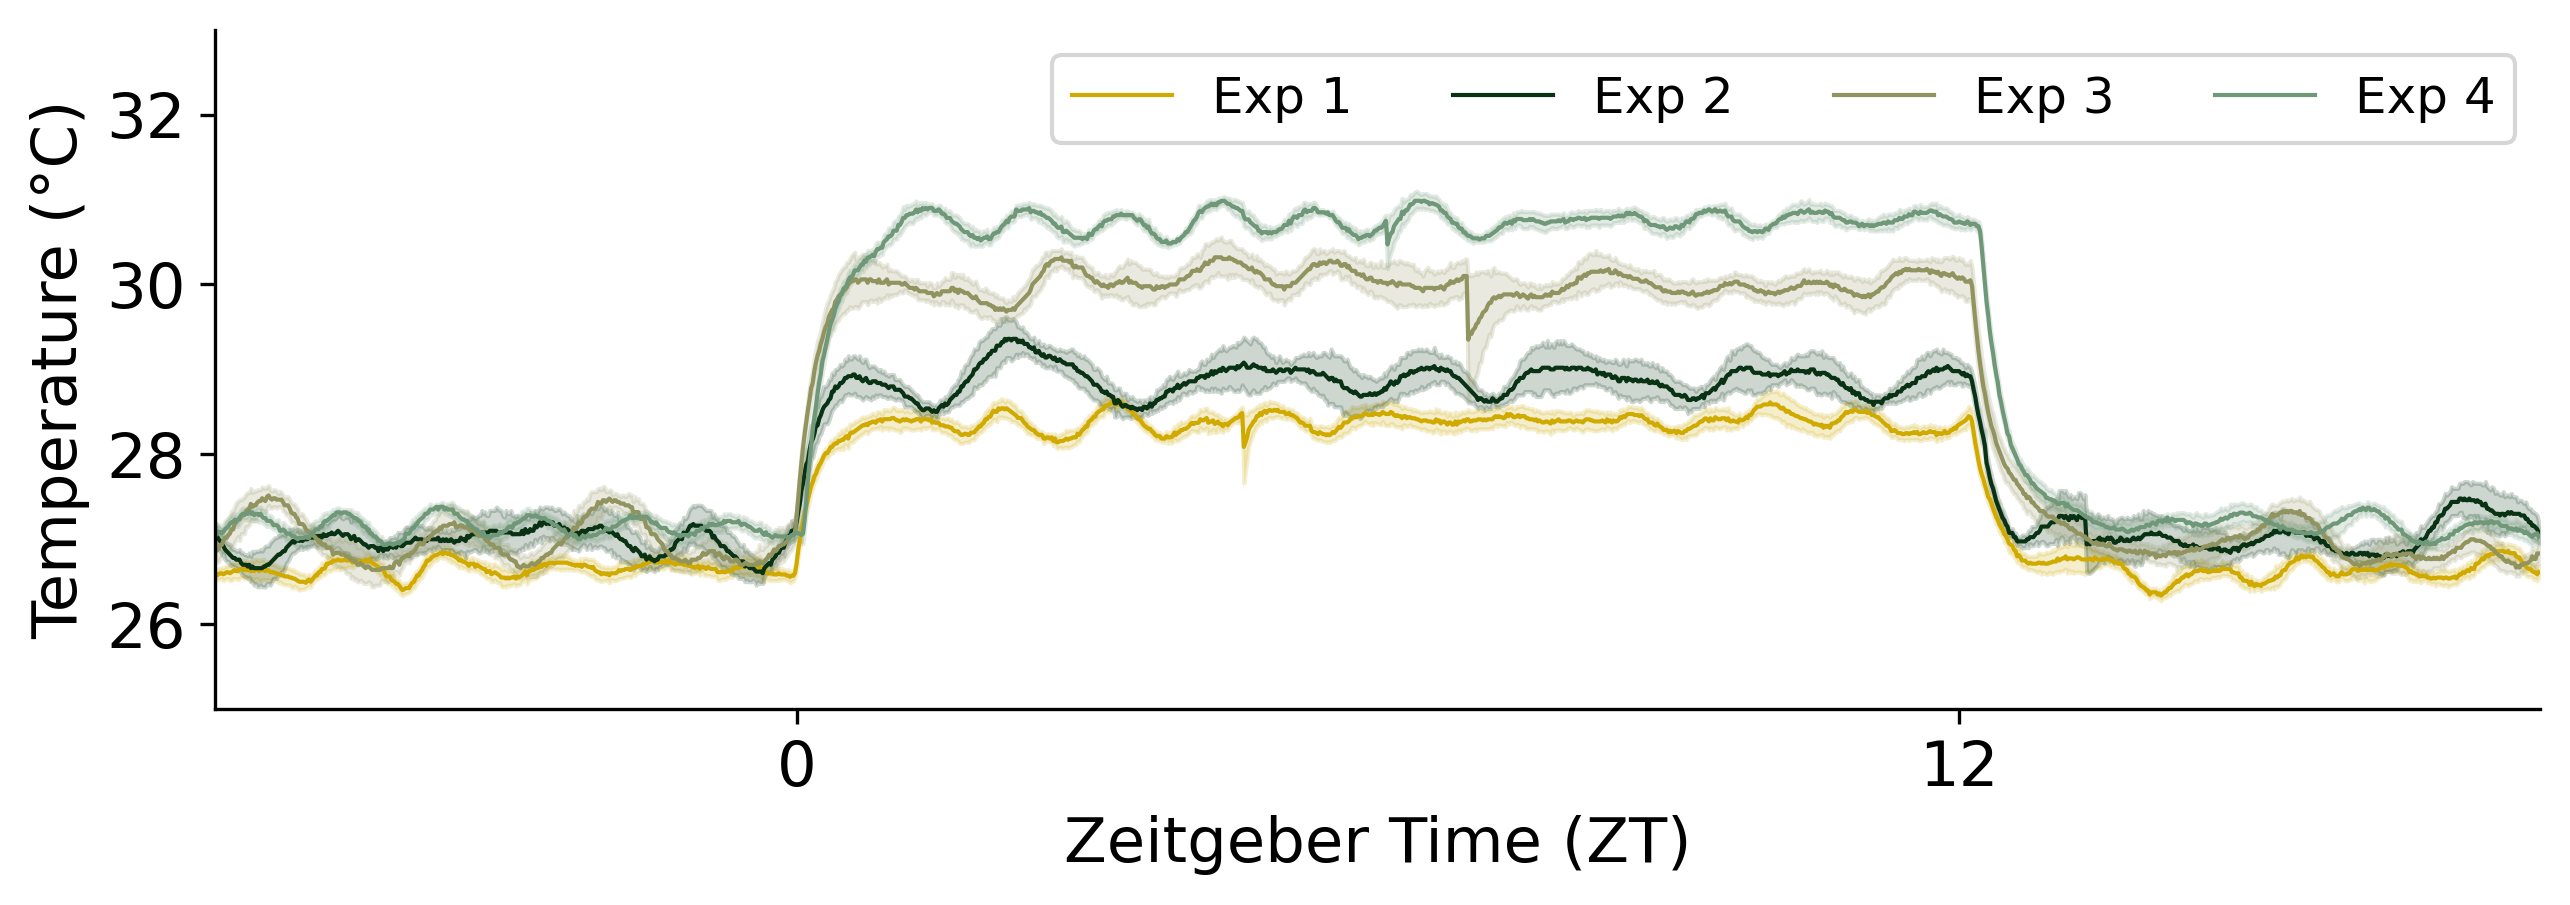

In [6]:
import matplotlib.pyplot as plt
import palettable
plt.rcParams['svg.fonttype'] = 'none'
plt.figure(figsize=(10, 3), dpi=300)
# plt.plot(df['datetime'], df['TEMPERATURE'], '-', color='black',zorder=-1)
# name_list = []
i=0
for df in list_of_humid:
    df.loc[:,'zeit'] = df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 10) % 24
    if i in [0,1]:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 10+12) % 24
    else:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 9+12) % 24
    sns.lineplot(
        data=df,
        x="zeit", y="TEMPERATURE",
        lw=1, 
        color=palettable.wesanderson.Cavalcanti_5.mpl_colors[i],
        legend="brief",
        label = "Exp " + str((i+1)),
        ci=68)
    i = i +1
plt.xticks([6, 18], [0, 12])
plt.xlim(0,24)
plt.ylabel("Temperature (°C)")
plt.xlabel("Zeitgeber Time (ZT)")
sns.despine()
plt.legend(loc=0, fontsize=12,ncol=5)
plt.ylim(25,33)
plt.savefig('humidity-logger-temp_ftnone.svg', dpi=600, bbox_inches='tight')



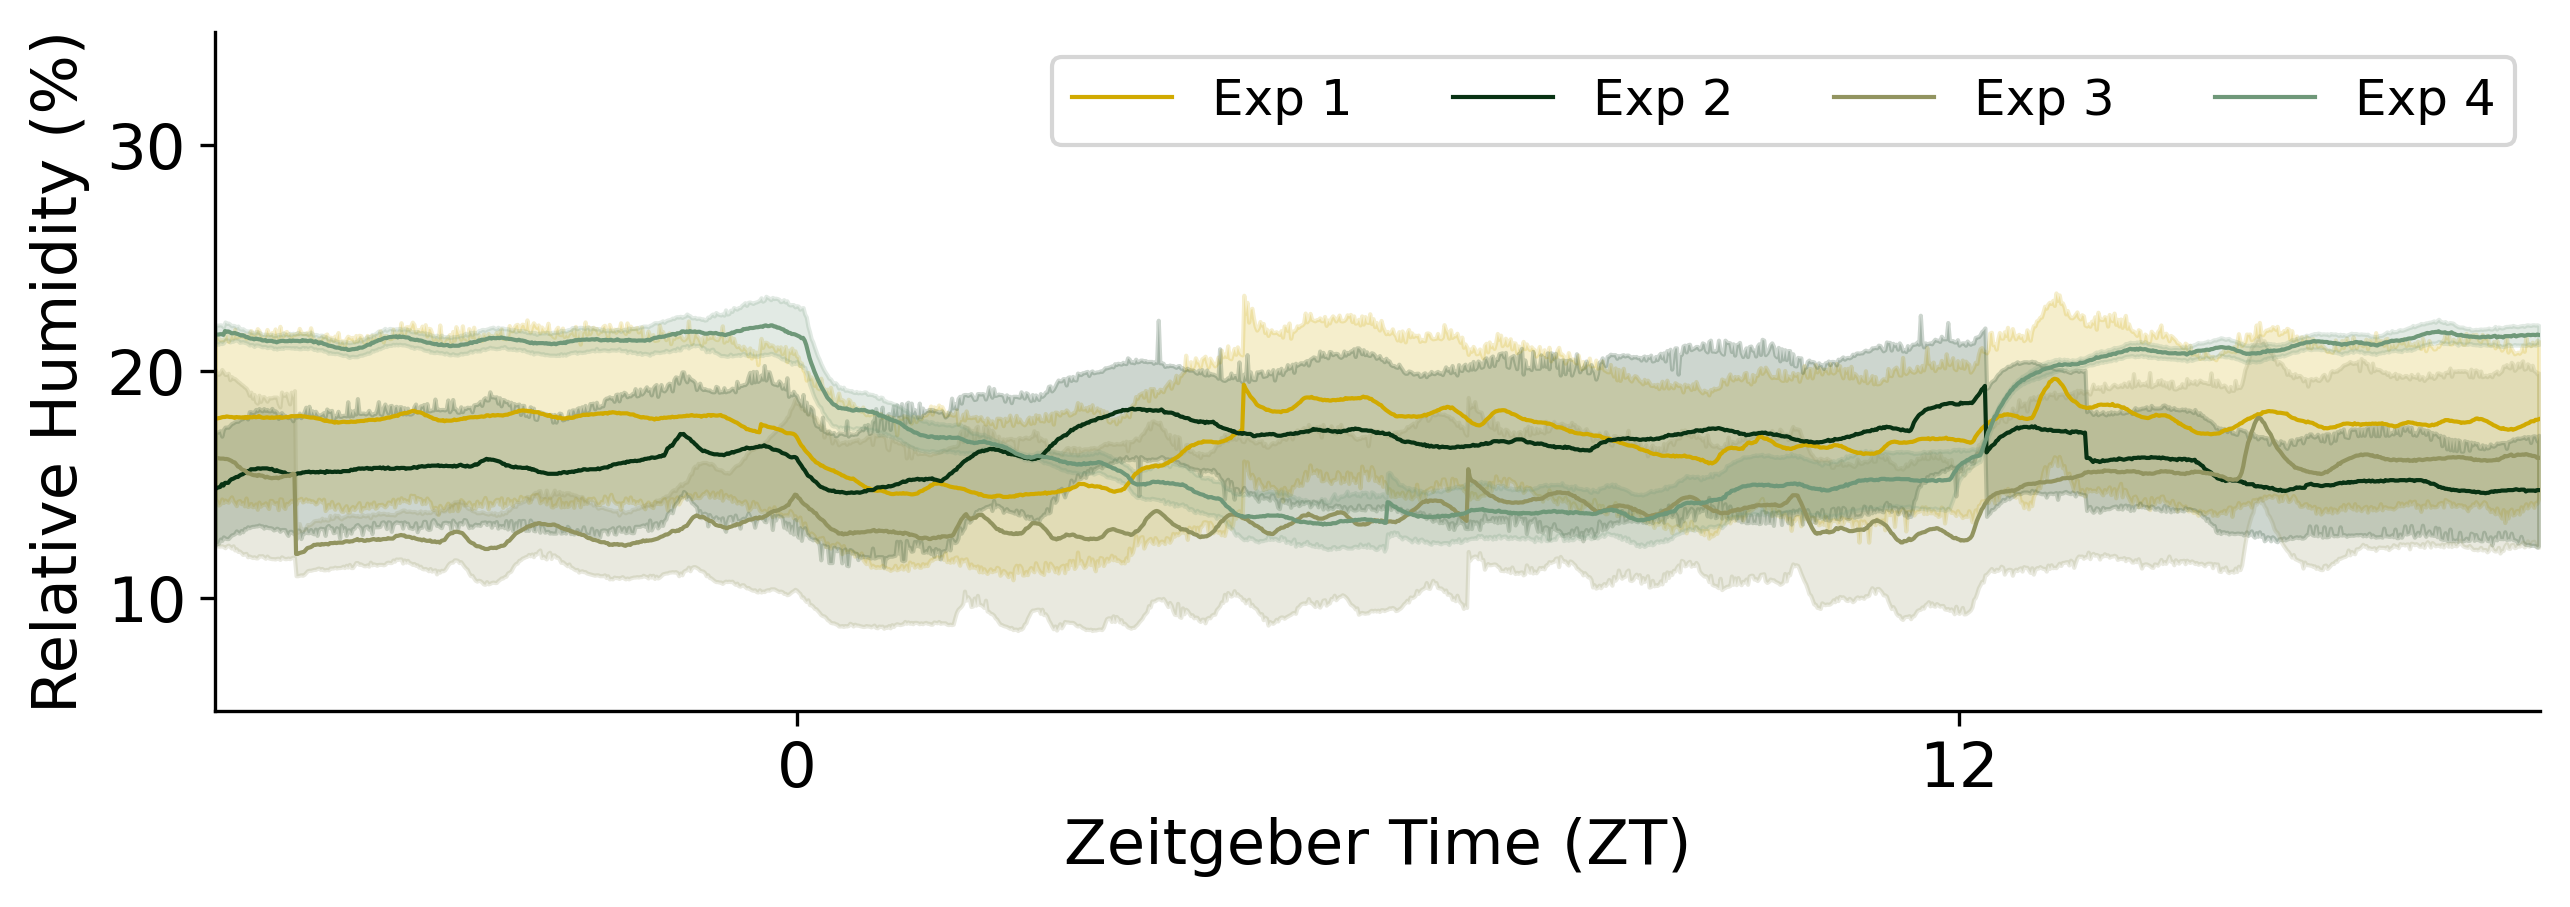

In [7]:
import matplotlib.pyplot as plt
import palettable


plt.figure(figsize=(10,3), dpi=300)
# plt.plot(df['datetime'], df['TEMPERATURE'], '-', color='black',zorder=-1)
# name_list = []
i=0
for df in list_of_humid:
    if i in [0,1]:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 10+12) % 24
    else:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 9+12) % 24
    sns.lineplot(
        data=df,
        x="zeit", y="RELATIVE-HUMIDITY",
        lw=1, 
        color=palettable.wesanderson.Cavalcanti_5.mpl_colors[i],
        legend="brief",
        label = "Exp " + str(i+1),
        ci=68)
    i = i +1
plt.xlim(0,24)
plt.xticks([6, 18], [0, 12])
plt.ylabel("Relative Humidity (%)")
plt.xlabel("Zeitgeber Time (ZT)")
sns.despine()

plt.legend(loc=0, fontsize=12,ncol=5)
plt.ylim(5,35)
plt.savefig('humidity-logger-humidity_ftnone.svg', dpi=600, bbox_inches='tight')


In [ ]:
temp_0217 = pd.read_csv('../data/humidity-and-temp/20220217/20220217.CSV', header=None,names=['date','time','temp_0','temp_1','line0','line1'])
temp_0312 = pd.read_csv('../data/humidity-and-temp/20220312/20220312.CSV', header=None,names=['date','time','temp_0','temp_1','line0','line1'])
temp_0326 = pd.read_csv('../data/humidity-and-temp/20220326/20220326.CSV', header=None,names=['date','time','temp_0','temp_1','line0','line1'])
temp_0418 = pd.read_csv('../data/humidity-and-temp/20220418/20220418.CSV', header=None,names=['date','time','temp_0','temp_1','line0','line1'])

In [ ]:
fine_temp = pd.concat([temp_0217,temp_0312,temp_0326,temp_0418],ignore_index=True)
fine_temp_dfs = [temp_0217,temp_0312,temp_0326,temp_0418]


In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3), dpi=300)
# plt.plot(df['datetime'], df['TEMPERATURE'], '-', color='black',zorder=-1)
# name_list = []
i=0
expmts = [1,2,3,4]
for df in fine_temp_dfs:
    df.loc[:,'datetime'] = pd.to_datetime(df.date.astype(str)+' '+df.time.astype(str))
    if i in [0]:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 10) % 24
    else:
        df.loc[:,'zeit'] = ((df.datetime.dt.hour +df.datetime.dt.minute/60) + 9) % 24
    mask_0 = df['temp_0'] < 50
    mask_1 =  df['temp_1'] < 50
    df =df.where(mask_0 & mask_1)
    print(i)
    sns.lineplot(
        data=df,
        x="zeit", y="temp_0",
        lw=1, 
        color=palettable.wesanderson.Cavalcanti_5.mpl_colors[i],
        legend="brief",
        label = "Exp " + str(expmts[i]),
        ci=68)
    sns.lineplot(
        data=df,
        x="zeit", y="temp_1",
        lw=1, 
        color=palettable.wesanderson.Cavalcanti_5.mpl_colors[i],
        legend="brief",
        ci=68)
        # label = "Exp " + str((i+1)))
    i = i +1
plt.xlim(0,24)
plt.xticks([6, 18], [0, 12])
plt.ylabel("Temperature (°C)")
plt.xlabel("Zeitgeber Time (ZT)")
sns.despine()
plt.legend(loc=0, fontsize=12,ncol=5)
plt.ylim(25,32)
plt.savefig('20220217_humidtemp_temperature.svg', dpi=600, bbox_inches='tight')